# Tugas 6 - Decission Tree

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
iris = pd.read_csv("https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv")

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris['Sepal_diff'] = iris['SepalLengthCm']-iris['SepalWidthCm']
iris['Petal_diff'] = iris['PetalLengthCm']-iris['PetalWidthCm']

In [5]:
iris['Sepal_Petal_len_diff'] = iris['SepalLengthCm']-iris['PetalLengthCm']
iris['Sepal_Petal_width_diff'] = iris['SepalWidthCm']-iris['PetalWidthCm']

In [6]:
iris['Sepal_Petal_len_wid_diff'] = iris['SepalLengthCm']-iris['PetalLengthCm']
iris['Sepal_Petal_wid_len_diff'] = iris['SepalWidthCm']-iris['PetalWidthCm']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_len_diff,Sepal_Petal_width_diff,Sepal_Petal_len_wid_diff,Sepal_Petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,3.7,3.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,3.5,2.8
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,3.4,3.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,3.1,2.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,3.6,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,1.5,0.7
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,1.3,0.6
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,1.3,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,0.8,1.1


In [7]:
iris.drop(['Id'],axis=1, inplace=True)

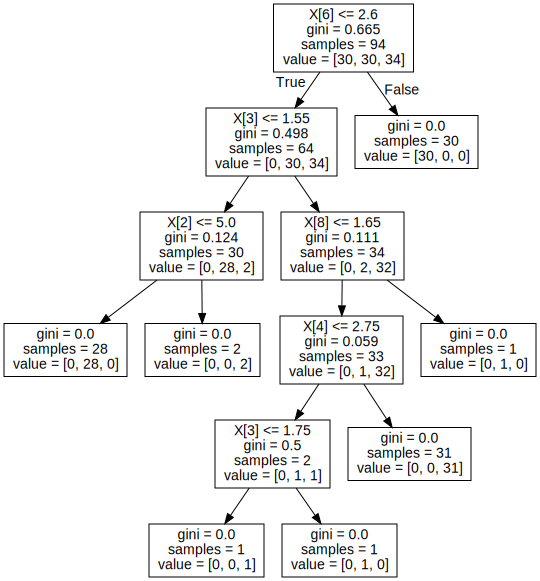

In [8]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# memisahkan variable independen dan variable target dari data iris

x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Sepal_diff','Petal_diff', 'Sepal_Petal_len_diff', 'Sepal_Petal_width_diff', 'Sepal_Petal_len_wid_diff', 'Sepal_Petal_wid_len_diff']]
y = iris['Species']

# sebelum melatih model kota split data kita dulu kedalam data train dan data test untuk tujuan validasi
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y, test_size=0.30, random_state=42)

# split data ke validasi train dan validasi test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

# membuat decision tree clasifikasi dan melatihnya dengan training dataset
iris_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
iris_clf.fit(Xt,Yt)

# visualisasi tree berdasarkan train dataset
dot_data = tree.export_graphviz(iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [9]:
# cek validasi test data pada training model dan mendapatkan peforma matriks

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = iris_clf.predict(Xcv)

print('Accuracy sccore for validation test is: ',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv, Y_hat)

Accuracy sccore for validation test is:  0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]])

In [10]:
YT_hat = iris_clf.predict(Xtest)
YT_hat

print("model accuracy score on totally unseen data(Xtest) is:",accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest, YT_hat)

model accuracy score on totally unseen data(Xtest) is: 93.33333333333333 %


array([[[26,  0],
        [ 0, 19]],

       [[31,  1],
        [ 2, 11]],

       [[30,  2],
        [ 1, 12]]])

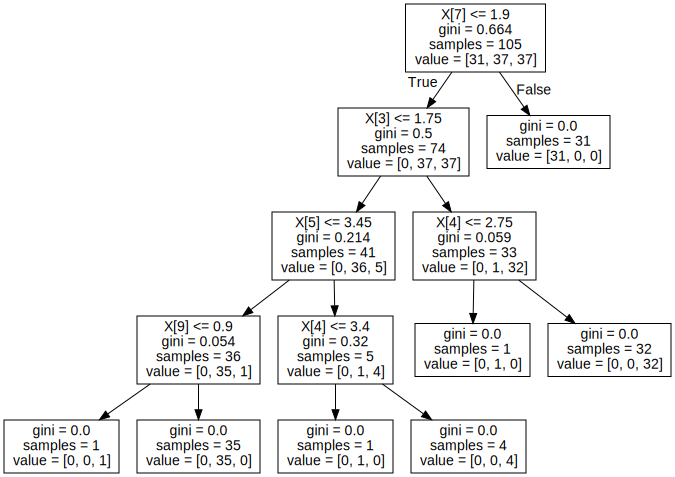

In [11]:
iris_Fclf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
iris_Fclf.fit(Xtrain, Ytrain)

# visualisasi tree berdasarkan train dataset
dot_data = tree.export_graphviz(iris_Fclf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [12]:
YT_FHat = iris_Fclf.predict(Xtest)
YT_FHat

print("model accuracy score on totally unseen data(Xtest) is:",accuracy_score(Ytest, YT_FHat)*100,'%')

model accuracy score on totally unseen data(Xtest) is: 97.77777777777777 %
